In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
olshop_df1 = pd.read_csv('online_shoppers_intention.csv')
olshop_df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
olshop_df2 = olshop_df1.copy(deep=True)

In [4]:
list_nan = 'Administrative Administrative_Duration Informational Informational_Duration ProductRelated ProductRelated_Duration BounceRates ExitRates'.split()
for i in list_nan:
    olshop_df2[i].fillna(olshop_df2[i].mode().values[0], inplace=True)
olshop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
list_minus1 = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
for i in list_minus1:
    olshop_df2[i].replace(-1.0, olshop_df2[i].mode()[0], inplace=True)
olshop_df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
# Variasi DataFrame
dfm = olshop_df2.copy(deep=True)
feat_to_del = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'OperatingSystems', 'Browser']
dfm.drop(feat_to_del, axis=1, inplace=True)
display(dfm.head())

from sklearn.preprocessing import LabelEncoder
dfa = dfm.copy(deep=True)
dfa['Revenue'] = LabelEncoder().fit_transform(dfa['Revenue'])
obj_feat = dfa.columns.tolist()[6:11]
dfa.drop(obj_feat, axis=1, inplace=True)
display(dfa.head())

dfb = dfm.copy(deep=True)
obj_feat = dfb.columns.tolist()[6:12]
dfb = dfb[obj_feat]
revenue = dfb['Revenue'].unique().tolist()
revenue_dict = {revenue[i]: i for i in range (len(revenue))}
dfb['Revenue'] = [revenue_dict[i] for i in dfb['Revenue'].tolist()]
display(dfb.head())

dfc = dfm.copy(deep=True)
obj_feat = dfc.columns.tolist()[6:12]
dfc = dfc[obj_feat]
display(dfc.head())

float_col1 = dfm.columns.tolist()[:3]
float_col2 = dfm.columns.tolist()[3:6]
dfd = dfa.drop(float_col2, axis=1)
display(dfd.head())

dfe = dfa.drop(float_col1, axis=1)
display(dfe.head())

from sklearn.preprocessing import LabelEncoder
dff = pd.DataFrame()
for i in dfc.columns.tolist():
    dff[i] = LabelEncoder().fit_transform(dfc[i])
display(dff.head())

dfg = dfa.drop('Revenue', axis=1)
dfg = pd.concat([dfg, dff], axis=1)
dfg.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1.0,0.20,0.0,0.0,Feb,1,1,Returning_Visitor,False,False
1,0.0,0.0,2.0,0.10,0.0,0.0,Feb,1,2,Returning_Visitor,False,False
2,0.0,0.0,1.0,0.20,0.0,0.0,Feb,9,3,Returning_Visitor,False,False
3,0.0,0.0,2.0,0.14,0.0,0.0,Feb,2,4,Returning_Visitor,False,False
4,0.0,0.0,10.0,0.05,0.0,0.0,Feb,1,4,Returning_Visitor,True,False


,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Revenue
0,0.0,0.0,1.0,0.20,0.0,0.0,0
1,0.0,0.0,2.0,0.10,0.0,0.0,0
2,0.0,0.0,1.0,0.20,0.0,0.0,0
3,0.0,0.0,2.0,0.14,0.0,0.0,0
4,0.0,0.0,10.0,0.05,0.0,0.0,0


,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,Returning_Visitor,False,0
1,Feb,1,2,Returning_Visitor,False,0
2,Feb,9,3,Returning_Visitor,False,0
3,Feb,2,4,Returning_Visitor,False,0
4,Feb,1,4,Returning_Visitor,True,0


,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,Returning_Visitor,False,False
1,Feb,1,2,Returning_Visitor,False,False
2,Feb,9,3,Returning_Visitor,False,False
3,Feb,2,4,Returning_Visitor,False,False
4,Feb,1,4,Returning_Visitor,True,False


,Administrative,Informational,ProductRelated,Revenue
0,0.0,0.0,1.0,0
1,0.0,0.0,2.0,0
2,0.0,0.0,1.0,0
3,0.0,0.0,2.0,0
4,0.0,0.0,10.0,0


,ExitRates,PageValues,SpecialDay,Revenue
0,0.20,0.0,0.0,0
1,0.10,0.0,0.0,0
2,0.20,0.0,0.0,0
3,0.14,0.0,0.0,0
4,0.05,0.0,0.0,0


,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,2,0,0,2,0,0
1,2,0,1,2,0,0
2,2,8,2,2,0,0
3,2,1,3,2,0,0
4,2,0,3,2,1,0


,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1.0,0.20,0.0,0.0,2,0,0,2,0,0
1,0.0,0.0,2.0,0.10,0.0,0.0,2,0,1,2,0,0
2,0.0,0.0,1.0,0.20,0.0,0.0,2,8,2,2,0,0
3,0.0,0.0,2.0,0.14,0.0,0.0,2,1,3,2,0,0
4,0.0,0.0,10.0,0.05,0.0,0.0,2,0,3,2,1,0


# Menentukan Model Machine Learning

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [8]:
dfg.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

Marketer itu gelontarkan dana marketing ke Prediksi Beli atau Prediksi Tidak Beli?

Pertimbangan secara parah-parahan yang mana:
Case 1:
Kalau Marketer gelontarkan anggaran ke Prediksi BELI.
- Kalau ternyata TIDAK BELI, maka RUGI. (FP)
- Kalau BELI, baru TIDAK RUGI.

Case 2:
Kalau Marketer gelontarkan anggaran ke Prediksi TIDAK BELI.
- Kalau ternyata BELI, maka TIDAK RUGI. (FN)
- Kalau ternyata TIDAK BELI, maka bisa dikatakan juga TIDAK RUGI karena kan sudah diingatkan Prediksi secara benar bahwa TIDAK BELI. Karena berarti target marketing disini adalah BRANDING bukan REVENUE.

KESIMPULAN BENARNYA BERARTI TEKAN NILAI **"FP"** SERENDAH-RENDAHNYA, karena di kasus ini Marketer ingin mengalokasikan anggaran ke sesuatu yang jelas menambah Revenue.

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = dfg.drop('Revenue', axis=1) # Kolom survived dihapus di X karena mau dipakai sebagai target (dependent value) (kunci jawaban)
y = dfg['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
len(X_train) == len(y_train)

True

In [12]:
display(y_train.value_counts())
display(y_test.value_counts())

0    8307
1    1557
Name: Revenue, dtype: int64

0    2115
1     351
Name: Revenue, dtype: int64

In [13]:
display(X_train)
display(y_train)

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
3339,0.0,0.0,4.0,0.050000,0.00000,0.0,6,1,1,2,0
10953,0.0,0.0,1.0,0.200000,0.00000,0.0,1,2,1,2,0
8536,0.0,0.0,1.0,0.200000,0.00000,0.0,7,2,2,2,0
7766,6.0,0.0,11.0,0.040000,0.00000,0.0,7,0,2,2,0
8280,5.0,0.0,17.0,0.022222,0.00000,0.0,1,1,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10955,4.0,0.0,6.0,0.012500,0.00000,0.0,1,2,7,0,0
905,3.0,5.0,43.0,0.011667,3.31108,0.0,5,0,0,2,1
5192,1.0,0.0,49.0,0.048014,0.00000,0.2,6,0,3,2,0
12172,2.0,0.0,70.0,0.027791,0.00000,0.0,7,2,7,2,0


3339     0
10953    0
8536     0
7766     0
8280     0
        ..
10955    0
905      1
5192     0
12172    1
235      0
Name: Revenue, Length: 9864, dtype: int64

In [14]:
display(X_test)
display(y_test)

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
5487,0.0,0.0,1.0,0.200000,0.000000,0.0,3,1,4,0,1
7736,5.0,0.0,34.0,0.030247,8.041078,0.0,0,0,0,2,0
5310,0.0,0.0,2.0,0.050000,0.000000,0.0,6,0,2,2,0
2982,2.0,0.0,20.0,0.003333,0.000000,0.0,6,0,1,2,1
662,4.0,0.0,8.0,0.010000,0.000000,0.0,5,0,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6688,3.0,0.0,11.0,0.004444,0.000000,0.0,3,0,2,0,0
1305,0.0,0.0,5.0,0.160000,0.000000,0.0,5,0,0,2,0
4434,3.0,0.0,37.0,0.030511,7.941532,0.0,6,0,1,2,0
9358,0.0,0.0,10.0,0.050000,0.000000,0.0,7,8,1,0,1


5487    0
7736    1
5310    0
2982    0
662     0
       ..
6688    0
1305    0
4434    0
9358    0
5424    0
Name: Revenue, Length: 2466, dtype: int64

## Resample

In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Oversampling

In [16]:
ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_ros.value_counts())
display(y_test.value_counts())

0    8307
1    1557
Name: Revenue, dtype: int64

1    8307
0    8307
Name: Revenue, dtype: int64

0    2115
1     351
Name: Revenue, dtype: int64

### SMOTE

In [17]:
smo = SMOTE(random_state=1)
X_smo, y_smo = smo.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_smo.value_counts())
display(y_test.value_counts())

0    8307
1    1557
Name: Revenue, dtype: int64

1    8307
0    8307
Name: Revenue, dtype: int64

0    2115
1     351
Name: Revenue, dtype: int64

### Undersampling

In [18]:
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_rus.value_counts())
display(y_test.value_counts())

0    8307
1    1557
Name: Revenue, dtype: int64

1    1557
0    1557
Name: Revenue, dtype: int64

0    2115
1     351
Name: Revenue, dtype: int64

## 1. Logistic Regression

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


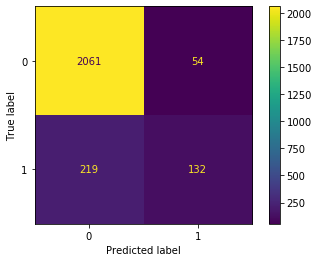

In [19]:
log = LogisticRegression(random_state=1)
log.fit(X_train, y_train)
# print('Slope/Coef:', log.coef_[0][0])
# print('C/Intercept:', log.intercept_[0])

log_pred = log.predict(X_test)
log_proba = log.predict_proba(X_test)

confusion_matrix(y_test, log_pred)

plot_confusion_matrix(log, X_test, y_test)

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


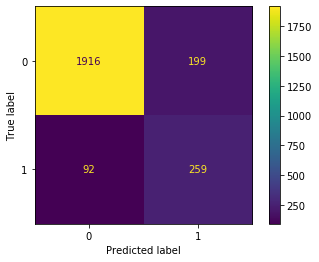

In [20]:
# Dengan Oversampling
log_ros = LogisticRegression(random_state=1)
log_ros.fit(X_ros, y_ros)
# print('Slope/Coef:', log.coef_[0][0])
# print('C/Intercept:', log.intercept_[0])

log_ros_pred = log_ros.predict(X_test)
log_ros_proba = log_ros.predict_proba(X_test)

confusion_matrix(y_test, log_ros_pred)

plot_confusion_matrix(log_ros, X_test, y_test)

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


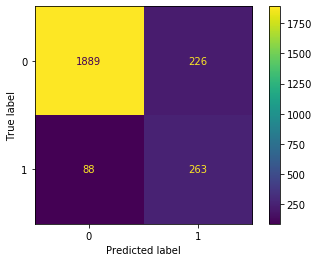

In [21]:
# Dengan SMOTE
log_smo = LogisticRegression(random_state=1)
log_smo.fit(X_smo, y_smo)
# print('Slope/Coef:', log.coef_[0][0])
# print('C/Intercept:', log.intercept_[0])

log_smo_pred = log_smo.predict(X_test)
log_smo_proba = log_smo.predict_proba(X_test)

confusion_matrix(y_test, log_smo_pred)

plot_confusion_matrix(log_smo, X_test, y_test)

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


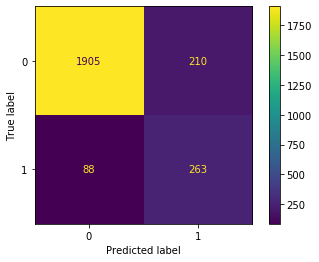

In [22]:
# Dengan Undersampling
log_rus = LogisticRegression(random_state=1)
log_rus.fit(X_rus, y_rus)
# print('Slope/Coef:', log.coef_[0][0])
# print('C/Intercept:', log.intercept_[0])

log_rus_pred = log_rus.predict(X_test)
log_rus_proba = log_rus.predict_proba(X_test)

confusion_matrix(y_test, log_rus_pred)

plot_confusion_matrix(log_rus, X_test, y_test)

Dengan **Logistic Regression** dan tanpa metode **Resample** dihasilkan nilai Precision (+) dan Recall (-) nya tertinggi. Precision(+) = TP / (TP+FP) , Recall(-) = TN / (TN+FP). Nilai Accuracy tidak menjadi perhatian utama karena jumlah data target featurenya (Revenue True dan Revenue False) tidak balanced (jauh lebih banyak Revenue False).

In [23]:
display(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred, target_names=['0/-/Not Revenue', '1/+/Revenue']))

array([[2061,   54],
       [ 219,  132]], dtype=int64)

                 precision    recall  f1-score   support

0/-/Not Revenue       0.90      0.97      0.94      2115
    1/+/Revenue       0.71      0.38      0.49       351

       accuracy                           0.89      2466
      macro avg       0.81      0.68      0.71      2466
   weighted avg       0.88      0.89      0.87      2466



In [24]:
y_test.value_counts()
# TN + FP = 2062 + 53 = 2115
# FN + TP = 216 + 135 = 351

0    2115
1     351
Name: Revenue, dtype: int64

In [25]:
confusion_matrix(y_test, log_pred)[0][0]

2061

In [26]:
log_model = pd.DataFrame({
    "Logistic Regression No Resample": [precision_score(y_test, log_pred), recall_score(y_test, log_pred, pos_label=0), list(confusion_matrix(y_test, log_pred).ravel())],
    "Logistic Regression With Oversampling": [precision_score(y_test, log_ros_pred), recall_score(y_test, log_ros_pred, pos_label=0), list(confusion_matrix(y_test, log_ros_pred).ravel())],
    "Logistic Regression With SMOTE": [precision_score(y_test, log_smo_pred), recall_score(y_test, log_smo_pred, pos_label=0), list(confusion_matrix(y_test, log_smo_pred).ravel())],
    "Logistic Regression With Undersampling": [precision_score(y_test, log_rus_pred), recall_score(y_test, log_rus_pred, pos_label=0), list(confusion_matrix(y_test, log_rus_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
log_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
Logistic Regression No Resample,0.709677,0.974468,"[2061, 54, 219, 132]"
Logistic Regression With Oversampling,0.565502,0.90591,"[1916, 199, 92, 259]"
Logistic Regression With SMOTE,0.537832,0.893144,"[1889, 226, 88, 263]"
Logistic Regression With Undersampling,0.556025,0.900709,"[1905, 210, 88, 263]"


## 2. Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

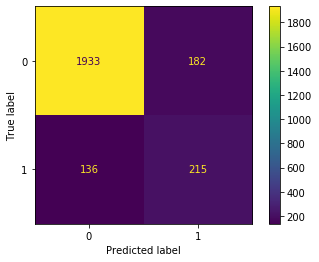

In [28]:
dtr = DecisionTreeClassifier(random_state=8)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_proba = dtr.predict_proba(X_test)

confusion_matrix(y_test, dtr_pred)

plot_confusion_matrix(dtr, X_test, y_test)

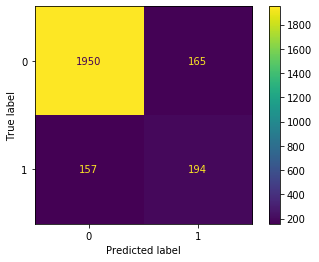

In [29]:
# Dengan Oversampling
dtr_ros = DecisionTreeClassifier(random_state=9)
dtr_ros.fit(X_ros, y_ros)

dtr_ros_pred = dtr_ros.predict(X_test)
dtr_ros_proba = dtr_ros.predict_proba(X_test)

confusion_matrix(y_test, dtr_ros_pred)

plot_confusion_matrix(dtr_ros, X_test, y_test)

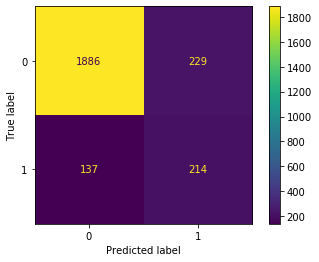

In [30]:
# Dengan SMOTE
dtr_smo = DecisionTreeClassifier(random_state=5)
dtr_smo.fit(X_smo, y_smo)

dtr_smo_pred = dtr_smo.predict(X_test)
dtr_smo_proba = dtr_smo.predict_proba(X_test)

confusion_matrix(y_test, dtr_smo_pred)

plot_confusion_matrix(dtr_smo, X_test, y_test)

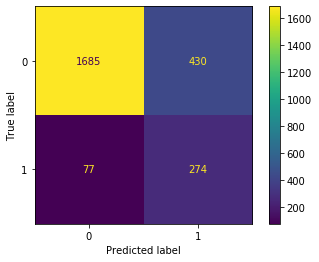

In [31]:
# Dengan Undersampling
dtr_rus = DecisionTreeClassifier(random_state=10)
dtr_rus.fit(X_rus, y_rus)

dtr_rus_pred = dtr_rus.predict(X_test)
dtr_rus_proba = dtr_rus.predict_proba(X_test)

confusion_matrix(y_test, dtr_rus_pred)

plot_confusion_matrix(dtr_rus, X_test, y_test)

Dengan **Decision Tree Classifier** dan tanpa metode **Resample** dihasilkan nilai Precision (+) dan Recall (-) nya tertinggi. Precision(+) = TP / (TP+FP) , Recall(-) = TN / (TN+FP)

In [32]:
display(confusion_matrix(y_test, dtr_pred))
print(classification_report(y_test, dtr_pred))

array([[1933,  182],
       [ 136,  215]], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2115
           1       0.54      0.61      0.57       351

    accuracy                           0.87      2466
   macro avg       0.74      0.76      0.75      2466
weighted avg       0.88      0.87      0.87      2466



In [33]:
dtr_model = pd.DataFrame({
    "Decision Tree No Resample": [precision_score(y_test, dtr_pred), recall_score(y_test, dtr_pred, pos_label=0), list(confusion_matrix(y_test, dtr_pred).ravel())],
    "Decision Tree With Oversampling": [precision_score(y_test, dtr_ros_pred), recall_score(y_test, dtr_ros_pred, pos_label=0), list(confusion_matrix(y_test, dtr_ros_pred).ravel())],
    "Decision Tree With SMOTE": [precision_score(y_test, dtr_smo_pred), recall_score(y_test, dtr_smo_pred, pos_label=0), list(confusion_matrix(y_test, dtr_smo_pred).ravel())],
    "Decision Tree With Undersampling": [precision_score(y_test, dtr_rus_pred), recall_score(y_test, dtr_rus_pred, pos_label=0), list(confusion_matrix(y_test, dtr_rus_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
dtr_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
Decision Tree No Resample,0.541562,0.913948,"[1933, 182, 136, 215]"
Decision Tree With Oversampling,0.54039,0.921986,"[1950, 165, 157, 194]"
Decision Tree With SMOTE,0.48307,0.891726,"[1886, 229, 137, 214]"
Decision Tree With Undersampling,0.389205,0.79669,"[1685, 430, 77, 274]"


In [34]:
# from sklearn import tree
# tree.export_graphviz(dtr, out_file = 'dtr_olshop.dot', feature_names=X_train.columns,
#                     class_names=['Revenue False', 'Revenue True'])

# cek file yg bernama titanic.dot di folder yang sama
# lalu copy semua codes yang ada di dalamnya dan paste di https://dreampuf.github.io/GraphvizOnline/ untuk melihat gambar tree nya
# lalu klik kanan pada gambar untuk download gambarnya, beri nama "dtr_olshop.png", lalu simpan di folder yang sama

In [35]:
# Untuk import gambar tree nya kesini (jupyter)
# from IPython.display import Image
# Image(filename='dtr_olshop.png')  # untuk membuka gambar yang tadi di download

In [36]:
# dtr_fi = pd.DataFrame({'feature': X_train.columns, 'score': dtr.feature_importances_}).sort_values('score', ascending=False)
# dtr_fi

## 3. Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

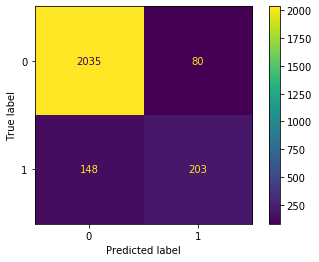

In [38]:
rfc = RandomForestClassifier(random_state=7)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

confusion_matrix(y_test, rfc_pred)

plot_confusion_matrix(rfc, X_test, y_test)

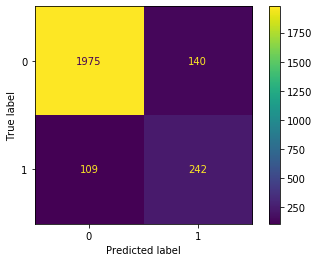

In [39]:
# Dengan Oversampling
rfc_ros = RandomForestClassifier(random_state=3)
rfc_ros.fit(X_ros, y_ros)

rfc_ros_pred = rfc_ros.predict(X_test)
rfc_ros_proba = rfc_ros.predict_proba(X_test)

confusion_matrix(y_test, rfc_ros_pred)

plot_confusion_matrix(rfc_ros, X_test, y_test)

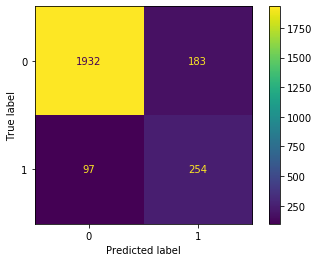

In [40]:
# Dengan SMOTE
rfc_smo = RandomForestClassifier(random_state=1)
rfc_smo.fit(X_smo, y_smo)

rfc_smo_pred = rfc_smo.predict(X_test)
rfc_smo_proba = rfc_smo.predict_proba(X_test)

confusion_matrix(y_test, rfc_smo_pred)

plot_confusion_matrix(rfc_smo, X_test, y_test)

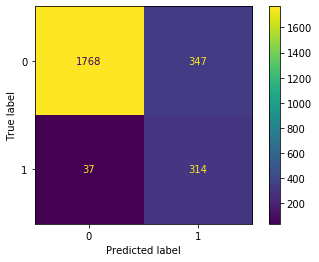

In [41]:
# Dengan Undersampling
rfc_rus = RandomForestClassifier(random_state=3)
rfc_rus.fit(X_rus, y_rus)

rfc_rus_pred = rfc_rus.predict(X_test)
rfc_rus_proba = rfc_rus.predict_proba(X_test)

confusion_matrix(y_test, rfc_rus_pred)

plot_confusion_matrix(rfc_rus, X_test, y_test)

Dengan **Random Forest Classifier** dan tanpa metode **Resample** dihasilkan nilai Precision (+) dan Recall (-) nya tertinggi. Precision(+) = TP / (TP+FP) , Recall(-) = TN / (TN+FP)

In [42]:
display(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

array([[2035,   80],
       [ 148,  203]], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2115
           1       0.72      0.58      0.64       351

    accuracy                           0.91      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.90      0.91      0.90      2466



In [43]:
rfc_model = pd.DataFrame({
    "Random Forest No Resample": [precision_score(y_test, rfc_pred), recall_score(y_test, rfc_pred, pos_label=0), list(confusion_matrix(y_test, rfc_pred).ravel())],
    "Random Forest With Oversampling": [precision_score(y_test, rfc_ros_pred), recall_score(y_test, rfc_ros_pred, pos_label=0), list(confusion_matrix(y_test, rfc_ros_pred).ravel())],
    "Random Forest With SMOTE": [precision_score(y_test, rfc_smo_pred), recall_score(y_test, rfc_smo_pred, pos_label=0), list(confusion_matrix(y_test, rfc_smo_pred).ravel())],
    "Random Forest With Undersampling": [precision_score(y_test, rfc_rus_pred), recall_score(y_test, rfc_rus_pred, pos_label=0), list(confusion_matrix(y_test, rfc_rus_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
rfc_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
Random Forest No Resample,0.717314,0.962175,"[2035, 80, 148, 203]"
Random Forest With Oversampling,0.633508,0.933806,"[1975, 140, 109, 242]"
Random Forest With SMOTE,0.581236,0.913475,"[1932, 183, 97, 254]"
Random Forest With Undersampling,0.475038,0.835934,"[1768, 347, 37, 314]"


In [44]:
# rfc_fi = pd.DataFrame({'feature': X_train.columns, 'score': rfc.feature_importances_}).sort_values('score', ascending=False)
# rfc_fi

## 4. AdaBoost Classifier

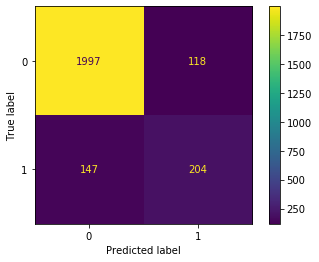

In [45]:
ada = AdaBoostClassifier(random_state=1) # random_state tidak memberi perubahan
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_proba = ada.predict_proba(X_test)

confusion_matrix(y_test, ada_pred)

plot_confusion_matrix(ada, X_test, y_test)

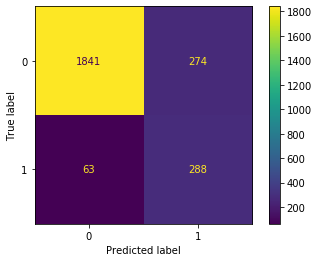

In [46]:
# Dengan Oversampling
ada_ros = AdaBoostClassifier(random_state=1) # random_state tidak memberi perubahan
ada_ros.fit(X_ros, y_ros)

ada_ros_pred = ada_ros.predict(X_test)
ada_ros_proba = ada_ros.predict_proba(X_test)

confusion_matrix(y_test, ada_ros_pred)

plot_confusion_matrix(ada_ros, X_test, y_test)

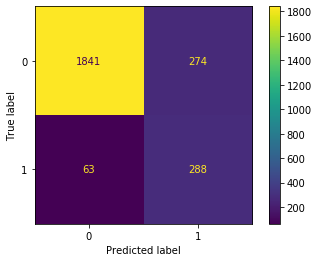

In [47]:
# Dengan SMOTE
ada_smo = AdaBoostClassifier(random_state=1) # random_state tidak memberi perubahan
ada_smo.fit(X_ros, y_ros)

ada_smo_pred = ada_smo.predict(X_test)
ada_smo_proba = ada_smo.predict_proba(X_test)

confusion_matrix(y_test, ada_smo_pred)

plot_confusion_matrix(ada_smo, X_test, y_test)

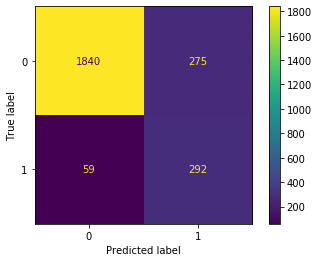

In [48]:
# Dengan Undersampling
ada_rus = AdaBoostClassifier(random_state=1) # random_state tidak memberi perubahan
ada_rus.fit(X_rus, y_rus)

ada_rus_pred = ada_rus.predict(X_test)
ada_rus_proba = ada_rus.predict_proba(X_test)

confusion_matrix(y_test, ada_rus_pred)

plot_confusion_matrix(ada_rus, X_test, y_test)

Dengan **AdaBoost Classifier** dan tanpa metode **Resample** dihasilkan nilai Precision (+) dan Recall (-) nya tertinggi. Precision(+) = TP / (TP+FP) , Recall(-) = TN / (TN+FP)

In [49]:
display(confusion_matrix(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

array([[1997,  118],
       [ 147,  204]], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2115
           1       0.63      0.58      0.61       351

    accuracy                           0.89      2466
   macro avg       0.78      0.76      0.77      2466
weighted avg       0.89      0.89      0.89      2466



In [50]:
ada_model = pd.DataFrame({
    "AdaBoost Classifier No Resample": [precision_score(y_test, ada_pred), recall_score(y_test, ada_pred, pos_label=0), list(confusion_matrix(y_test, ada_pred).ravel())],
    "AdaBoost Classifier With Oversampling": [precision_score(y_test, ada_ros_pred), recall_score(y_test, ada_ros_pred, pos_label=0), list(confusion_matrix(y_test, ada_ros_pred).ravel())],
    "AdaBoost Classifier With SMOTE": [precision_score(y_test, ada_smo_pred), recall_score(y_test, ada_smo_pred, pos_label=0), list(confusion_matrix(y_test, ada_smo_pred).ravel())],
    "AdaBoost Classifier With Undersampling": [precision_score(y_test, ada_rus_pred), recall_score(y_test, ada_rus_pred, pos_label=0), list(confusion_matrix(y_test, ada_rus_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
ada_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
AdaBoost Classifier No Resample,0.63354,0.944208,"[1997, 118, 147, 204]"
AdaBoost Classifier With Oversampling,0.512456,0.870449,"[1841, 274, 63, 288]"
AdaBoost Classifier With SMOTE,0.512456,0.870449,"[1841, 274, 63, 288]"
AdaBoost Classifier With Undersampling,0.514991,0.869976,"[1840, 275, 59, 292]"


In [51]:
# ada_fi = pd.DataFrame({'feature': X_train.columns, 'score': ada.feature_importances_}).sort_values('score', ascending=False)
# ada_fi

## 5. Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

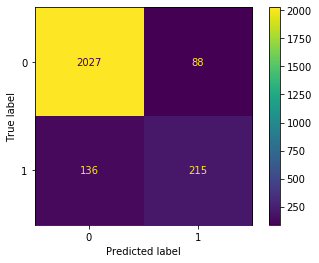

In [53]:
gbc = GradientBoostingClassifier(random_state=1) # random_state tidak memberi perubahan
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

confusion_matrix(y_test, gbc_pred)

plot_confusion_matrix(gbc, X_test, y_test)

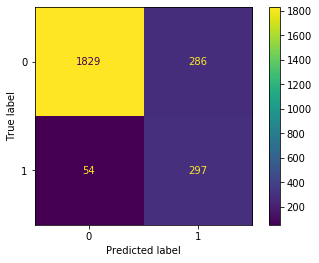

In [54]:
# Dengan Oversampling
gbc_ros = GradientBoostingClassifier(random_state=1) # random_state tidak memberi perubahan
gbc_ros.fit(X_ros, y_ros)

gbc_ros_pred = gbc_ros.predict(X_test)
gbc_ros_proba = gbc_ros.predict_proba(X_test)

confusion_matrix(y_test, gbc_ros_pred)

plot_confusion_matrix(gbc_ros, X_test, y_test)

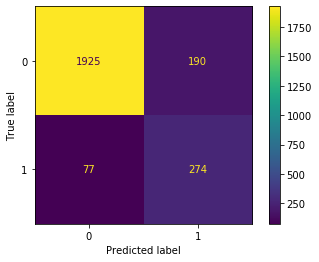

In [55]:
# Dengan SMOTE
gbc_smo = GradientBoostingClassifier(random_state=1) # random_state tidak memberi perubahan
gbc_smo.fit(X_smo, y_smo)

gbc_smo_pred = gbc_smo.predict(X_test)
gbc_smo_proba = gbc_smo.predict_proba(X_test)

confusion_matrix(y_test, gbc_smo_pred)

plot_confusion_matrix(gbc_smo, X_test, y_test)

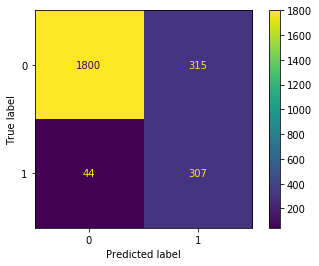

In [56]:
# Dengan Undersampling
gbc_rus = GradientBoostingClassifier(random_state=1) # random_state tidak memberi perubahan
gbc_rus.fit(X_rus, y_rus)

gbc_rus_pred = gbc_rus.predict(X_test)
gbc_rus_proba = gbc_rus.predict_proba(X_test)

confusion_matrix(y_test, gbc_rus_pred)

plot_confusion_matrix(gbc_rus, X_test, y_test)

Dengan **GradientBoosting Classifier** dan tanpa metode **Resample** dihasilkan nilai Precision (+) dan Recall (-) nya tertinggi. Precision(+) = TP / (TP+FP) , Recall(-) = TN / (TN+FP)

In [57]:
display(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

array([[2027,   88],
       [ 136,  215]], dtype=int64)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2115
           1       0.71      0.61      0.66       351

    accuracy                           0.91      2466
   macro avg       0.82      0.79      0.80      2466
weighted avg       0.90      0.91      0.91      2466



In [58]:
gbc_model = pd.DataFrame({
    "GradientBoosting Classifier No Resample": [precision_score(y_test, gbc_pred), recall_score(y_test, gbc_pred, pos_label=0), list(confusion_matrix(y_test, gbc_pred).ravel())],
    "GradientBoosting Classifier With Oversampling": [precision_score(y_test, gbc_ros_pred), recall_score(y_test, gbc_ros_pred, pos_label=0), list(confusion_matrix(y_test, gbc_ros_pred).ravel())],
    "GradientBoosting Classifier With SMOTE": [precision_score(y_test, gbc_smo_pred), recall_score(y_test, gbc_smo_pred, pos_label=0), list(confusion_matrix(y_test, gbc_smo_pred).ravel())],
    "GradientBoosting Classifier With Undersampling": [precision_score(y_test, gbc_rus_pred), recall_score(y_test, gbc_rus_pred, pos_label=0), list(confusion_matrix(y_test, gbc_rus_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
gbc_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
GradientBoosting Classifier No Resample,0.709571,0.958392,"[2027, 88, 136, 215]"
GradientBoosting Classifier With Oversampling,0.509434,0.864775,"[1829, 286, 54, 297]"
GradientBoosting Classifier With SMOTE,0.590517,0.910165,"[1925, 190, 77, 274]"
GradientBoosting Classifier With Undersampling,0.493569,0.851064,"[1800, 315, 44, 307]"


In [59]:
# gbc_fi = pd.DataFrame({'feature': X_train.columns, 'score': gbc.feature_importances_}).sort_values('score', ascending=False)
# gbc_fi

## K Nearest Neighbour Classifier

In [60]:
len(X_train)

9864

In [61]:
from sklearn.metrics import accuracy_score
for i in range(1,16,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_model_pred = knn_model.predict(X_test)

    print(f'for k={i}:', precision_score(y_test, knn_model_pred))
    
# Jadi pilihlah nilai k yang hasilnya paling tinggi

for k=1: 0.4973544973544973
for k=3: 0.5930599369085173
for k=5: 0.6241379310344828
for k=7: 0.6292517006802721
for k=9: 0.6466666666666666
for k=11: 0.6599326599326599
for k=13: 0.6565656565656566
for k=15: 0.6421404682274248


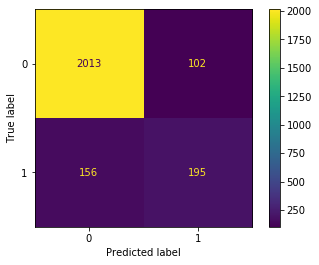

In [62]:
knn = KNeighborsClassifier(n_neighbors=13) # default p=2 (minkowski)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

confusion_matrix(y_test, knn_pred)

plot_confusion_matrix(knn, X_test, y_test)

In [63]:
y_test.value_counts()
# 0 = 2075 + 40
# 1 = 269 + 82

0    2115
1     351
Name: Revenue, dtype: int64

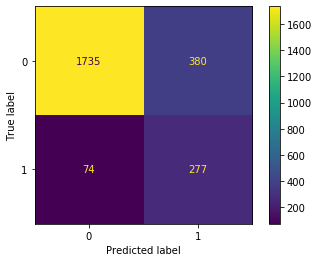

In [64]:
# Dengan Oversampling
knn_ros = KNeighborsClassifier(n_neighbors=13)
knn_ros.fit(X_ros, y_ros)
knn_ros_pred = knn_ros.predict(X_test)
knn_ros_proba = knn_ros.predict_proba(X_test)

confusion_matrix(y_test, knn_ros_pred)

plot_confusion_matrix(knn_ros, X_test, y_test)

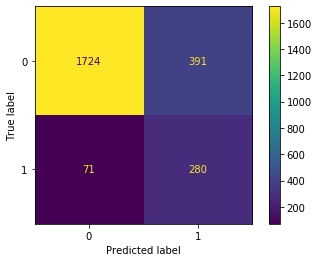

In [65]:
# Dengan SMOTE
knn_smo = KNeighborsClassifier(n_neighbors=13)
knn_smo.fit(X_smo, y_smo)
knn_smo_pred = knn_smo.predict(X_test)
knn_smo_proba = knn_smo.predict_proba(X_test)

confusion_matrix(y_test, knn_smo_pred)

plot_confusion_matrix(knn_smo, X_test, y_test)

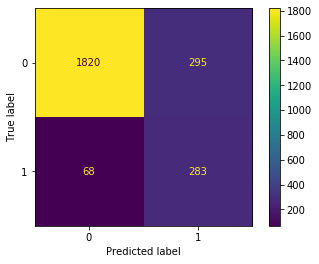

In [66]:
# Dengan Undersampling
knn_rus = KNeighborsClassifier(n_neighbors=13)
knn_rus.fit(X_rus, y_rus)
knn_rus_pred = knn_rus.predict(X_test)
knn_rus_proba = knn_rus.predict_proba(X_test)

confusion_matrix(y_test, knn_rus_pred)

plot_confusion_matrix(knn_rus, X_test, y_test)

Dengan **KNeighbors Classifier** dan tanpa metode **Resample** dihasilkan nilai Precision (+) dan Recall (-) nya tertinggi. Precision(+) = TP / (TP+FP) , Recall(-) = TN / (TN+FP)

In [67]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2115
           1       0.66      0.56      0.60       351

    accuracy                           0.90      2466
   macro avg       0.79      0.75      0.77      2466
weighted avg       0.89      0.90      0.89      2466



In [68]:
knn_model = pd.DataFrame({
    "KNeighbors Classifier No Resample": [precision_score(y_test, knn_pred), recall_score(y_test, knn_pred, pos_label=0), list(confusion_matrix(y_test, knn_pred).ravel())],
    "KNeighbors Classifier With Oversampling": [precision_score(y_test, knn_ros_pred), recall_score(y_test, knn_ros_pred, pos_label=0), list(confusion_matrix(y_test, knn_ros_pred).ravel())],
    "KNeighbors Classifier With SMOTE": [precision_score(y_test, knn_smo_pred), recall_score(y_test, knn_smo_pred, pos_label=0), list(confusion_matrix(y_test, knn_smo_pred).ravel())],
    "KNeighbors Classifier With Undersampling": [precision_score(y_test, knn_rus_pred), recall_score(y_test, knn_rus_pred, pos_label=0), list(confusion_matrix(y_test, knn_rus_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
knn_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
KNeighbors Classifier No Resample,0.656566,0.951773,"[2013, 102, 156, 195]"
KNeighbors Classifier With Oversampling,0.421613,0.820331,"[1735, 380, 74, 277]"
KNeighbors Classifier With SMOTE,0.417288,0.81513,"[1724, 391, 71, 280]"
KNeighbors Classifier With Undersampling,0.489619,0.86052,"[1820, 295, 68, 283]"


### Pemilihan Metode Machine Learning untuk diproses lanjut:

In [69]:
ml_model = pd.DataFrame({
    "Logistic Regression": [precision_score(y_test, log_pred), recall_score(y_test, log_pred, pos_label=0), list(confusion_matrix(y_test, log_pred).ravel())],
    "Decision Tree Classifier": [precision_score(y_test, dtr_pred), recall_score(y_test, dtr_pred, pos_label=0), list(confusion_matrix(y_test, dtr_pred).ravel())],
    "Random Forest Classifier": [precision_score(y_test, rfc_pred), recall_score(y_test, rfc_pred, pos_label=0), list(confusion_matrix(y_test, rfc_pred).ravel())],
    "AdaBoost Classifier": [precision_score(y_test, ada_pred), recall_score(y_test, ada_pred, pos_label=0), list(confusion_matrix(y_test, ada_pred).ravel())],
    "GradientBoosting Classifier": [precision_score(y_test, gbc_pred), recall_score(y_test, gbc_pred, pos_label=0), list(confusion_matrix(y_test, gbc_pred).ravel())],
    "KNeighbors Classifier": [precision_score(y_test, knn_pred), recall_score(y_test, knn_pred, pos_label=0), list(confusion_matrix(y_test, knn_pred).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
ml_model

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
Logistic Regression,0.709677,0.974468,"[2061, 54, 219, 132]"
Decision Tree Classifier,0.541562,0.913948,"[1933, 182, 136, 215]"
Random Forest Classifier,0.717314,0.962175,"[2035, 80, 148, 203]"
AdaBoost Classifier,0.63354,0.944208,"[1997, 118, 147, 204]"
GradientBoosting Classifier,0.709571,0.958392,"[2027, 88, 136, 215]"
KNeighbors Classifier,0.656566,0.951773,"[2013, 102, 156, 195]"


In [70]:
ml_model['precision_score(+)'].sort_values(ascending=False)

Random Forest Classifier       0.717314
Logistic Regression            0.709677
GradientBoosting Classifier    0.709571
KNeighbors Classifier          0.656566
AdaBoost Classifier             0.63354
Decision Tree Classifier       0.541562
Name: precision_score(+), dtype: object

In [71]:
ml_model['recall_score(-)'].sort_values(ascending=False)

Logistic Regression            0.974468
Random Forest Classifier       0.962175
GradientBoosting Classifier    0.958392
KNeighbors Classifier          0.951773
AdaBoost Classifier            0.944208
Decision Tree Classifier       0.913948
Name: recall_score(-), dtype: object

In [72]:
# Random Forest Classifier or Logistic Regression ?

## Looking for the best parameters

### Random Forest Classifier

In [73]:
# rfc.get_params()

#### RandomSearchCV

In [74]:
# criterion_opsi = ['gini', 'entropy']
# max_depth_opsi = [10, 15, 20, 25]
# max_features_opsi = ['auto', 'sqrt', 'log2']
# n_estimators_opsi = [50, 75, 100, 150]
# max_samples_opsi = [None, 50, 100, 150]

# params = {'criterion': criterion_opsi, 'max_depth': max_depth_opsi, 'max_features': max_features_opsi,
#           'n_estimators': n_estimators_opsi, 'max_samples': max_samples_opsi}
# params

In [75]:
# rfc = RandomForestClassifier(random_state=7)
# random_for_rfc = RandomizedSearchCV(estimator=rfc, param_distributions = params, cv = 7, random_state=1)
# # random_for_rfc.fit(X_train, y_train)

In [76]:
# random_for_rfc.fit(X_train, y_train)

In [77]:
# random_for_rfc.best_estimator_

In [78]:
# rfc_random = random_for_rfc.best_estimator_
# rfc_random.get_params()

In [79]:
# rfc_random = RandomForestClassifier(random_state=7)
# rfc_random.fit(X_train, y_train)
# rfc_random_pred = rfc_random.predict(X_test)
# rfc_random_proba = rfc_random.predict_proba(X_test)

# confusion_matrix(y_test, rfc_random_pred)

# plot_confusion_matrix(rfc_random, X_test, y_test)

In [80]:
# rfc = RandomForestClassifier(random_state=7)
# rfc.fit(X_train, y_train)
# rfc_pred = rfc.predict(X_test)
# rfc_proba = rfc.predict_proba(X_test)

# confusion_matrix(y_test, rfc_pred)

# plot_confusion_matrix(rfc, X_test, y_test)

#### GridSearch CV

In [81]:
# grid_for_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=7)
# grid_for_rfc.fit(X_train, y_train)

In [82]:
# grid_for_rfc.best_estimator_

In [83]:
# rfc_grid = grid_for_rfc.best_estimator_
# rfc_grid.get_params()

In [84]:
# rfc_grid = RandomForestClassifier(random_state=7)
# rfc_grid.fit(X_train, y_train)
# rfc_grid_pred = rfc_grid.predict(X_test)
# rfc_grid_proba = rfc_grid.predict_proba(X_test)

# confusion_matrix(y_test, rfc_grid_pred)

# plot_confusion_matrix(rfc_grid, X_test, y_test)

**rfc_pred**, **rfc_random_pred**, **rfc_grid_pred** menghasilkan nilai yang sama. **RandomSCV** dan **GridSCV** tidak membuat perubahan lebih baik.

### Logistic Regression

In [85]:
# log.get_params()

In [86]:
# class_weight_opsi = [None, 'dict', 'balanced']
# penalty_opsi = ['l1', 'l2', 'elasticnet', None]

# log_params = {'class_weight': class_weight_opsi, 'penalty': penalty_opsi}
# log_params

In [87]:
# log = LogisticRegression(random_state=1)
# random_for_log = RandomizedSearchCV(estimator=log, param_distributions = log_params, cv = 7, random_state=1)
# random_for_log.fit(X_train, y_train)

In [88]:
# random_for_log.best_estimator_

In [89]:
# log_random = random_for_log.best_estimator_
# log_random.get_params()

In [90]:
# log_random = LogisticRegression(random_state=1)
# log_random.fit(X_train, y_train)
# # print('Slope/Coef:', log.coef_[0][0])
# # print('C/Intercept:', log.intercept_[0])

# log_random_pred = log_random.predict(X_test)
# log_random_proba = log_random.predict_proba(X_test)

# confusion_matrix(y_test, log_random_pred)

# plot_confusion_matrix(log_random, X_test, y_test)

In [91]:
### Pakai Hyperparameter tuning RandomSearchCV dan GridSCV tidak memberi pengaruh ke perubahan yg lebih baik

# KFold Validation

In [92]:
kf = KFold(n_splits=8, random_state=1, shuffle=True)
kf

KFold(n_splits=8, random_state=1, shuffle=True)

In [93]:
kf.get_n_splits(X)

8

In [94]:
display(X.head())
print(len(X))

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,1.0,0.20,0.0,0.0,2,0,0,2,0
1,0.0,0.0,2.0,0.10,0.0,0.0,2,0,1,2,0
2,0.0,0.0,1.0,0.20,0.0,0.0,2,8,2,2,0
3,0.0,0.0,2.0,0.14,0.0,0.0,2,1,3,2,0
4,0.0,0.0,10.0,0.05,0.0,0.0,2,0,3,2,1


12330


In [95]:
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    print(fold)
    print('TRAIN:', train_index, '\nTEST:', test_index)

1
TRAIN: [    0     1     2 ... 12326 12327 12329] 
TEST: [    4     7    17 ... 12321 12322 12328]
2
TRAIN: [    0     1     2 ... 12327 12328 12329] 
TEST: [    6    16    28 ... 12307 12312 12324]
3
TRAIN: [    0     1     2 ... 12327 12328 12329] 
TEST: [   21    24    25 ... 12289 12303 12305]
4
TRAIN: [    0     2     3 ... 12326 12328 12329] 
TEST: [    1    10    11 ... 12309 12316 12327]
5
TRAIN: [    0     1     2 ... 12327 12328 12329] 
TEST: [    3     5    19 ... 12302 12317 12326]
6
TRAIN: [    0     1     2 ... 12326 12327 12328] 
TEST: [    8     9    12 ... 12314 12315 12329]
7
TRAIN: [    1     2     3 ... 12327 12328 12329] 
TEST: [    0    14    23 ... 12304 12308 12320]
8
TRAIN: [    0     1     3 ... 12327 12328 12329] 
TEST: [    2    15    18 ... 12313 12323 12325]


In [96]:
def KScore(model, xtr, xts, ytr, yts):
    model.fit(xtr, ytr)
    pred = model.predict(xts)
    return (precision_score(yts, pred), recall_score(yts, pred, pos_label=0), list(confusion_matrix(yts, pred).ravel()))

In [97]:
score = []
for train_index, test_index in kf.split(X):
    Xk_train = X.iloc[train_index,:]
    Xk_test = X.iloc[test_index,:]
    yk_train = y.iloc[train_index]
    yk_test = y.iloc[test_index]
    score.append(KScore(rfc, X_train, X_test, y_train, y_test)) # disini pakai model (engine) "rfc" (RandomForestClassifier).

score

[(0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203]),
 (0.7173144876325088, 0.9621749408983451, [2035, 80, 148, 203])]

In [98]:
kfold_df = pd.DataFrame(score, columns=['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)'],
                       index = range(1,9))
kfold_df

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
1,0.717314,0.962175,"[2035, 80, 148, 203]"
2,0.717314,0.962175,"[2035, 80, 148, 203]"
3,0.717314,0.962175,"[2035, 80, 148, 203]"
4,0.717314,0.962175,"[2035, 80, 148, 203]"
5,0.717314,0.962175,"[2035, 80, 148, 203]"
6,0.717314,0.962175,"[2035, 80, 148, 203]"
7,0.717314,0.962175,"[2035, 80, 148, 203]"
8,0.717314,0.962175,"[2035, 80, 148, 203]"


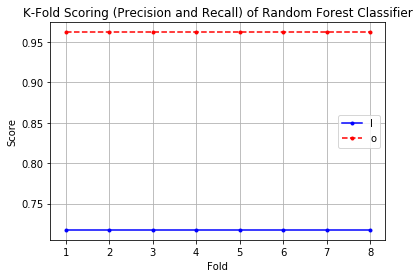

In [99]:
plt.title('K-Fold Scoring (Precision and Recall) of Random Forest Classifier')
plt.plot(kfold_df.index, kfold_df['precision_score(+)'], 'b.-', label='Precision(+)')
plt.plot(kfold_df.index, kfold_df['recall_score(-)'], 'r.--', label='Recall(-)')
plt.xlabel('Fold') # Fold itu artinya percobaan yg keberapa kali
plt.ylabel('Score') # Score itu artinya score dari percobaan itu
plt.legend('lower right')
plt.grid()
plt.show()

#### KFold Validation Logistic Regression

In [100]:
score = []
for train_index, test_index in kf.split(X):
    Xk_train = X.iloc[train_index,:]
    Xk_test = X.iloc[test_index,:]
    yk_train = y.iloc[train_index]
    yk_test = y.iloc[test_index]
    score.append(KScore(log, X_train, X_test, y_train, y_test)) # disini pakai model (engine) "log" (Logistic Regression).

kfold_df = pd.DataFrame(score, columns=['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)'],
                       index = range(1,9))
kfold_df

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
1,0.709677,0.974468,"[2061, 54, 219, 132]"
2,0.709677,0.974468,"[2061, 54, 219, 132]"
3,0.709677,0.974468,"[2061, 54, 219, 132]"
4,0.709677,0.974468,"[2061, 54, 219, 132]"
5,0.709677,0.974468,"[2061, 54, 219, 132]"
6,0.709677,0.974468,"[2061, 54, 219, 132]"
7,0.709677,0.974468,"[2061, 54, 219, 132]"
8,0.709677,0.974468,"[2061, 54, 219, 132]"


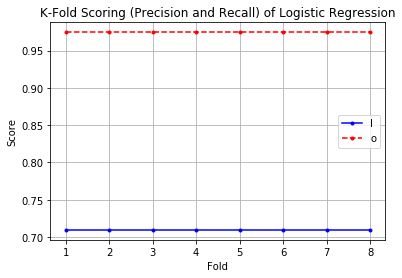

In [101]:
plt.title('K-Fold Scoring (Precision and Recall) of Logistic Regression')
plt.plot(kfold_df.index, kfold_df['precision_score(+)'], 'b.-', label='Precision(+)')
plt.plot(kfold_df.index, kfold_df['recall_score(-)'], 'r.--', label='Recall(-)')
plt.xlabel('Fold') # Fold itu artinya percobaan yg keberapa kali
plt.ylabel('Score') # Score itu artinya score dari percobaan itu
plt.legend('lower right')
plt.grid()
plt.show()

In [102]:
# RFC dan Log dites pakai KFold sama2 stabil

## ROC AUC

In [103]:
from sklearn.metrics import roc_curve, auc

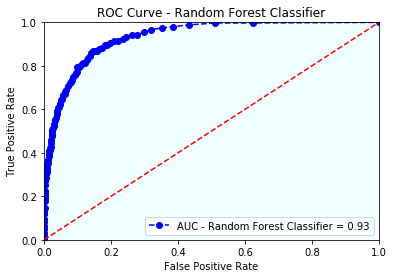

In [104]:
rfcprob1 = rfc_proba[:,1]
fpr_rfc1, tpr_rfc1, threshold_rfc1 = roc_curve(y_test, rfcprob1)
auc_rfc = auc(fpr_rfc1, tpr_rfc1)

plt.title('ROC Curve - Random Forest Classifier')
plt.plot(fpr_rfc1, tpr_rfc1, 'b--o', label='AUC - Random Forest Classifier = {}'.format(round(auc_rfc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # limit sumbu x
plt.ylim([0,1]) # limit sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc1, tpr_rfc1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [138]:
thres_rfc = pd.DataFrame({'thres': threshold_rfc1, 'tpr': tpr_rfc1, 'fpr': fpr_rfc1})
# display(thres_rfc['tpr'].sort_values(ascending=False))
# display(thres_rfc['fpr'].sort_values(ascending=True))
thres_rfc[(thres_rfc['tpr']>0.4) & (thres_rfc['fpr']<0.03)]
# thres_rfc

,thres,tpr,fpr
32,0.68,0.407407,0.015603
33,0.67,0.413105,0.017494
34,0.66,0.421652,0.018440
35,0.65,0.427350,0.019385
36,0.64,0.447293,0.019858
37,0.63,0.458689,0.020804
38,0.61,0.475783,0.023641
39,0.60,0.484330,0.023641
40,0.59,0.498575,0.023641
41,0.58,0.504274,0.025059


In [132]:
rfc_pred_roc = [0 if x < 0.62 else 1 for x in rfcprob1]
# rfc_pred_roc = [0 if x < 0.61 else 1 for x in rfcprob1]
# rfc_pred_roc = [0 if x < 0.55 else 1 for x in rfcprob1]
confusion_matrix(y_test, rfc_pred_roc)

array([[2068,   47],
       [ 187,  164]], dtype=int64)

In [107]:
confusion_matrix(y_test, rfc_pred)

array([[2035,   80],
       [ 148,  203]], dtype=int64)

In [108]:
# rfc_proba[:,1]
rfc.predict_proba(X_test)[:,1]

array([0.02, 0.34, 0.  , ..., 0.39, 0.07, 0.01])

(0, 1)

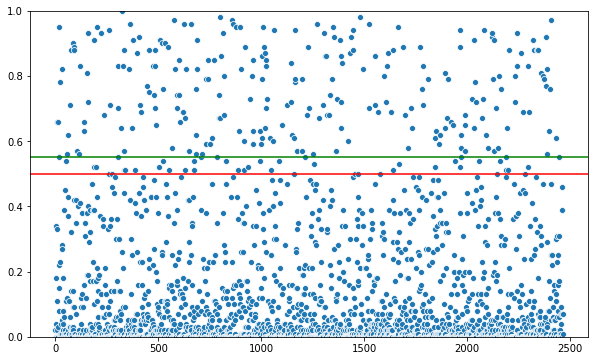

In [109]:
rfcprob1 = rfc.predict_proba(X_test)[:,1]
df_rfc_prob = pd.DataFrame(rfcprob1, columns=['rfc_prob1'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_rfc_prob['rfc_prob1'])
plt.axhline(0.5, color='red')
plt.axhline(0.55, color='green')
plt.ylim(0,1)

#### Custom Threshold Logistic Regression

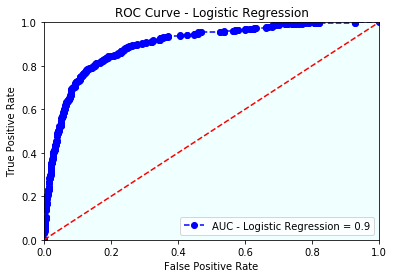

In [128]:
logprob1 = log_proba[:,1]
fpr_log1, tpr_log1, threshold_log1 = roc_curve(y_test, logprob1)
auc_log = auc(fpr_log1, tpr_log1)

plt.title('ROC Curve - Logistic Regression')
plt.plot(fpr_log1, tpr_log1, 'b--o', label='AUC - Logistic Regression = {}'.format(round(auc_log,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # limit sumbu x
plt.ylim([0,1]) # limit sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_log1, tpr_log1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [144]:
thres_log = pd.DataFrame({'thres': threshold_log1, 'tpr': tpr_log1, 'fpr': fpr_log1})
thres_log[(thres_log['tpr']>0.35) & (thres_log['fpr']<0.03)]

,thres,tpr,fpr
78,0.557278,0.353276,0.021749
79,0.541534,0.353276,0.023168
80,0.540229,0.356125,0.023168
81,0.537701,0.356125,0.023641
82,0.535033,0.358974,0.023641
83,0.534685,0.358974,0.024113
84,0.531142,0.361823,0.024113
85,0.530577,0.361823,0.024586
86,0.519251,0.370370,0.024586
87,0.517178,0.370370,0.025532


In [110]:
logprob1 = log.predict_proba(X_test)[:,1]
log_pred_roc = [0 if x < 0.53 else 1 for x in logprob1]
confusion_matrix(y_test, log_pred_roc)

array([[2063,   52],
       [ 224,  127]], dtype=int64)

In [111]:
confusion_matrix(y_test, log_pred)

array([[2061,   54],
       [ 219,  132]], dtype=int64)

(0, 1)

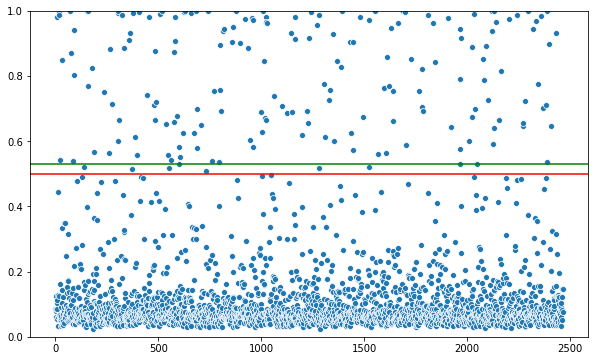

In [112]:
df_log_prob = pd.DataFrame(logprob1, columns=['log_prob1'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_log_prob['log_prob1'])
plt.axhline(0.5, color='red')
plt.axhline(0.53, color='green')
plt.ylim(0,1)

In [113]:
rfc_pred_roc = [0 if x < 0.62 else 1 for x in rfcprob1]
display(confusion_matrix(y_test, rfc_pred_roc))

log_pred_roc = [0 if x < 0.53 else 1 for x in logprob1]
display(confusion_matrix(y_test, log_pred_roc))

array([[2068,   47],
       [ 187,  164]], dtype=int64)

array([[2063,   52],
       [ 224,  127]], dtype=int64)

In [114]:
ml_model_a = pd.DataFrame({
    "Logistic Regression": [precision_score(y_test, log_pred_roc), recall_score(y_test, log_pred_roc, pos_label=0), list(confusion_matrix(y_test, log_pred_roc).ravel())],
    "Random Forest Classifier": [precision_score(y_test, rfc_pred_roc), recall_score(y_test, rfc_pred_roc, pos_label=0), list(confusion_matrix(y_test, rfc_pred_roc).ravel())]
}, index = ['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
ml_model_a

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
Logistic Regression,0.709497,0.975414,"[2063, 52, 224, 127]"
Random Forest Classifier,0.777251,0.977778,"[2068, 47, 187, 164]"


In [115]:
print(classification_report(y_test, rfc_pred_roc, target_names=['0/-/Not Revenue', '1/+/Revenue']))

                 precision    recall  f1-score   support

0/-/Not Revenue       0.92      0.98      0.95      2115
    1/+/Revenue       0.78      0.47      0.58       351

       accuracy                           0.91      2466
      macro avg       0.85      0.72      0.77      2466
   weighted avg       0.90      0.91      0.89      2466



Kesimpulan:
- Machine Learning dengan metode RandomForest dan Logistic Regression menghasilkan Precision(+) dan Recall(-) tertinggi.
- Dengan mencustom threshold, nilai FN masih tetap akan bertambah jika nilai FP berkurang. Jika nilai FN tinggi, maka TP rendah. Jika TP rendah, maka Precision_Score(+) akan rendah.
- Antara RandomForest dan Logistic Regression terpilih lebih baik **Model** dari **RandomForest**, karena nilai precision_score(+) nya dan recall_score(-) nya lebih tinggi.

Dengan **memilih features terbaik** dahulu untuk metode Machine Learning, maka dapat dihasilkan model lebih baik dari pada dengan semua features atau dengan pca.
Model terbaik yang dihasilkan adalah dengan pola **Random Forest Classifier (rfc)**.

## Joblib (Deploy Machine Learning Model to Dashboard)

In [116]:
import joblib

In [117]:
joblib.dump(rfc, 'rfc')

['rfc']

In [118]:
dfg

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1.0,0.200000,0.000000,0.0,2,0,0,2,0,0
1,0.0,0.0,2.0,0.100000,0.000000,0.0,2,0,1,2,0,0
2,0.0,0.0,1.0,0.200000,0.000000,0.0,2,8,2,2,0,0
3,0.0,0.0,2.0,0.140000,0.000000,0.0,2,1,3,2,0,0
4,0.0,0.0,10.0,0.050000,0.000000,0.0,2,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,0.0,53.0,0.029031,12.241717,0.0,1,0,0,2,1,0
12326,0.0,0.0,5.0,0.021333,0.000000,0.0,7,0,7,2,1,0
12327,0.0,0.0,6.0,0.086667,0.000000,0.0,7,0,12,2,1,0
12328,4.0,0.0,15.0,0.021053,0.000000,0.0,7,2,10,2,0,0


In [119]:
dfm

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1.0,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,0.0,0.0,2.0,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,0.0,0.0,1.0,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,0.0,0.0,2.0,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,0.0,0.0,10.0,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,0.0,53.0,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,0.0,0.0,5.0,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,0.0,0.0,6.0,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,4.0,0.0,15.0,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


In [120]:
col_encoded = ['SpecialDay', 'Month', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for i in col_encoded:
    print(i)
    display(dfg[i].unique())
    display(dfm[i].unique())
    print('')

SpecialDay


array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])


Month


array([2, 5, 6, 8, 4, 3, 0, 7, 9, 1])

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)


Region


array([0, 8, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)


TrafficType


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18,
       15, 16, 19], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)


VisitorType


array([2, 0, 1])

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)


Weekend


array([0, 1], dtype=int64)

array([False,  True])


Revenue


array([0, 1], dtype=int64)

array([False,  True])

In [121]:
display(X_test)
display(y_test)

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
5487,0.0,0.0,1.0,0.200000,0.000000,0.0,3,1,4,0,1
7736,5.0,0.0,34.0,0.030247,8.041078,0.0,0,0,0,2,0
5310,0.0,0.0,2.0,0.050000,0.000000,0.0,6,0,2,2,0
2982,2.0,0.0,20.0,0.003333,0.000000,0.0,6,0,1,2,1
662,4.0,0.0,8.0,0.010000,0.000000,0.0,5,0,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6688,3.0,0.0,11.0,0.004444,0.000000,0.0,3,0,2,0,0
1305,0.0,0.0,5.0,0.160000,0.000000,0.0,5,0,0,2,0
4434,3.0,0.0,37.0,0.030511,7.941532,0.0,6,0,1,2,0
9358,0.0,0.0,10.0,0.050000,0.000000,0.0,7,8,1,0,1


5487    0
7736    1
5310    0
2982    0
662     0
       ..
6688    0
1305    0
4434    0
9358    0
5424    0
Name: Revenue, Length: 2466, dtype: int64

In [122]:
y_test[y_test==1]

7736    1
6711    1
2012    1
7166    1
1941    1
       ..
8328    1
6025    1
1519    1
399     1
9223    1
Name: Revenue, Length: 351, dtype: int64

In [123]:
X_test.loc[[1941]]

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
1941,0.0,0.0,10.0,0.022222,88.784606,0.0,5,0,1,2,0


In [124]:
olshop_df2.loc[[1941]]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1941,0.0,0.0,0.0,0.0,10.0,408.0,0.0,0.022222,88.784606,0.0,Mar,2,2,1,2,Returning_Visitor,False,True


In [125]:
rfc.predict(X_test.loc[[1941]])

array([1], dtype=int64)

In [126]:
pred_proba = rfc.predict_proba(X_test.loc[[1941]])
pred_proba[0][1]

0.95

In [127]:
# pred_proba = rfc.predict_proba([feature])
rfc_pred_thres_custom = 0 if pred_proba[0][1] < 0.62 else 1
pred = 'REVENUE' if rfc_pred_thres_custom == 1 else 'NO REVENUE'
proba = pred_proba[0][0] if pred == 'NO REVENUE' else pred_proba[0][1]
endresult = f"{round(proba*100,4)}% {pred}"
endresult

'95.0% REVENUE'